In [1]:
%reset -f
from pythonrc import *

# Simple test

## Setup the environment and the configuration

In [2]:
def initialize_allocator(
    allocator_type: skadipy.allocator.AllocatorBase, **kwargs
) -> skadipy.allocator.AllocatorBase:
    return allocator_type(
        actuators=[
            tunnel,
            voithschneider_port,
            voithschneider_starboard
        ],
        force_torque_components=[
            skadipy.allocator.ForceTorqueComponent.X,
            skadipy.allocator.ForceTorqueComponent.Y,
            skadipy.allocator.ForceTorqueComponent.N,
        ],
        **kwargs,
    )


def my_initialize():
    return initialize_allocator(
        skadipy.allocator.reference_filters.MinimumMagnitude,
        gamma=0.001, mu=0.01, rho=100, time_step=0.01,
        control_barrier_function=skadipy.safety.ControlBarrierFunctionType.SUMSQUARE
    )


(<Figure size 800x800 with 3 Axes>,
 array([<Axes: xlabel='Sample [s]', ylabel='$F_x$ [N]'>,
        <Axes: xlabel='Sample [s]', ylabel='$F_y$ [N]'>,
        <Axes: xlabel='Sample [s]', ylabel='$M_z$ [N]'>], dtype=object))

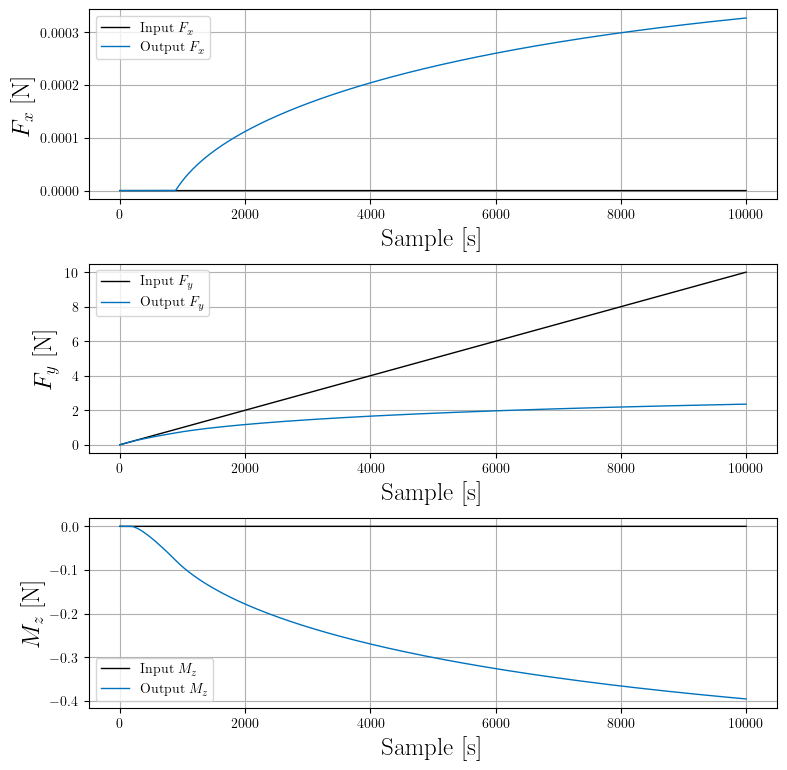

In [3]:
n = 10000
tau_cmd = np.linspace(
    (0,   0, 0, 0, 0, 0),
    (0,  10, 0, 0, 0, 0),
    n
)
xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=[my_initialize()])
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='$\\theta_1$', ylabel='$\\theta_2$'>)

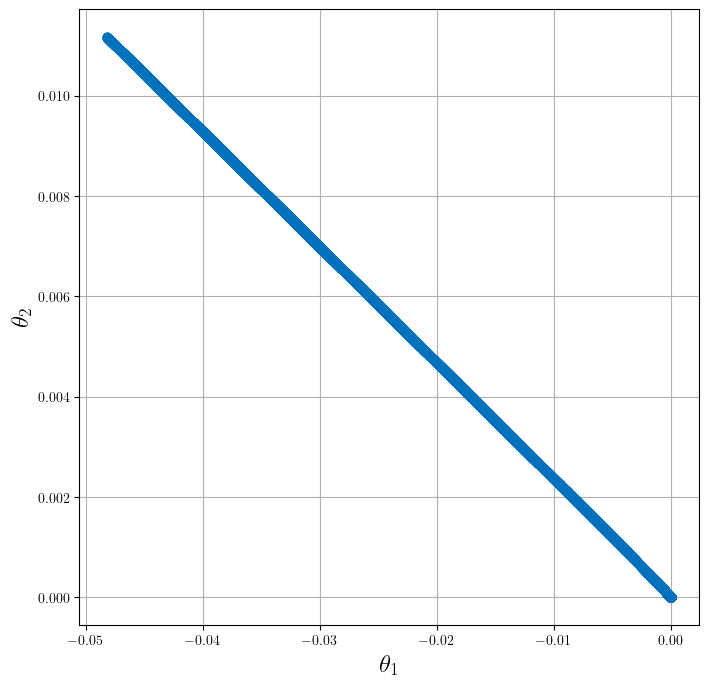

In [4]:
plot_theta_histories(theta_hist)

(<Figure size 800x800 with 3 Axes>,
 array([<Axes: xlabel='Sample [s]', ylabel='$F_x$ [N]'>,
        <Axes: xlabel='Sample [s]', ylabel='$F_y$ [N]'>,
        <Axes: xlabel='Sample [s]', ylabel='$M_z$ [N]'>], dtype=object))

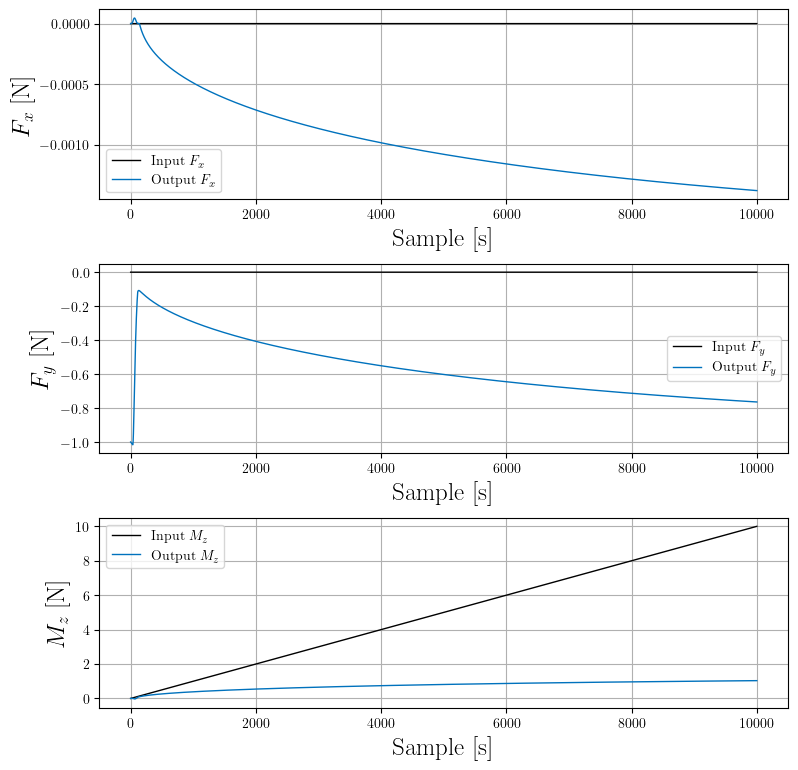

In [5]:
n = 10000
tau_cmd = np.linspace(
    (0, 0, 0, 0, 0, 0),
    (0, 0, 0, 0, 0, 10),
    n
)

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=[my_initialize()])
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

(<Figure size 800x800 with 3 Axes>,
 array([<Axes: xlabel='Sample [s]', ylabel='$F_x$ [N]'>,
        <Axes: xlabel='Sample [s]', ylabel='$F_y$ [N]'>,
        <Axes: xlabel='Sample [s]', ylabel='$M_z$ [N]'>], dtype=object))

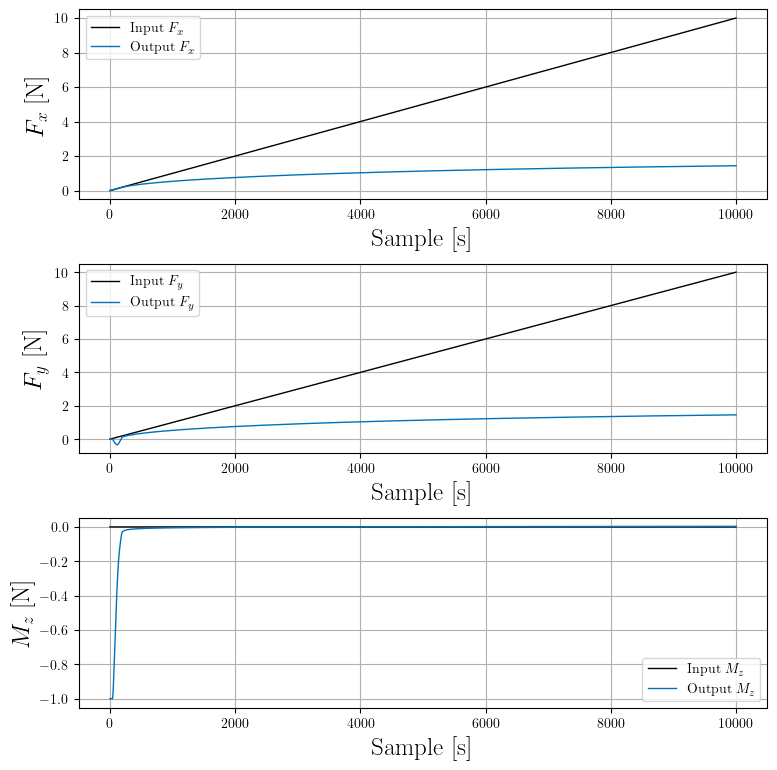

In [6]:
n = 10000
tau_cmd = np.linspace(
    (0,   0, 0, 0, 0, 0),
    (10, 10, 0, 0, 0, 0),
    n
)

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=[my_initialize()])
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='$\\theta_1$', ylabel='$\\theta_2$'>)

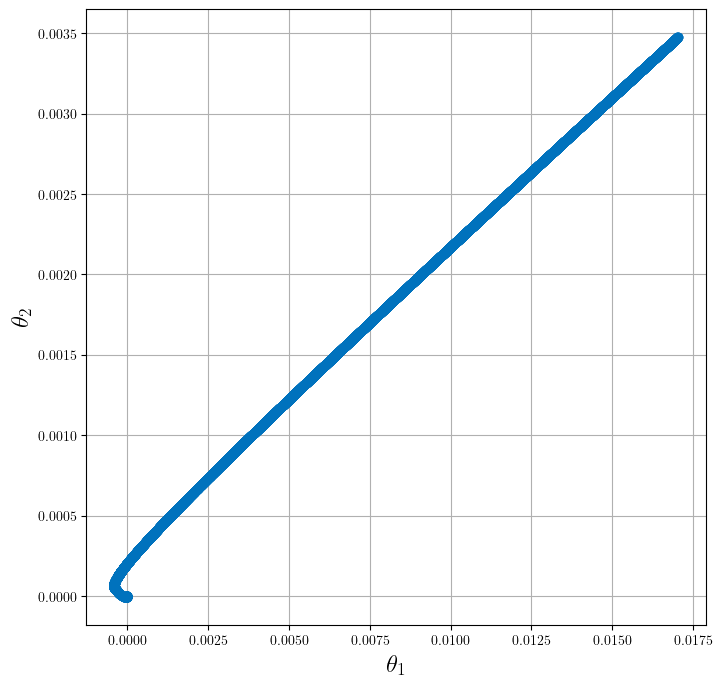

In [7]:
plot_theta_histories(theta_hist)

(<Figure size 800x800 with 3 Axes>,
 array([<Axes: xlabel='Sample [s]', ylabel='$F_x$ [N]'>,
        <Axes: xlabel='Sample [s]', ylabel='$F_y$ [N]'>,
        <Axes: xlabel='Sample [s]', ylabel='$M_z$ [N]'>], dtype=object))

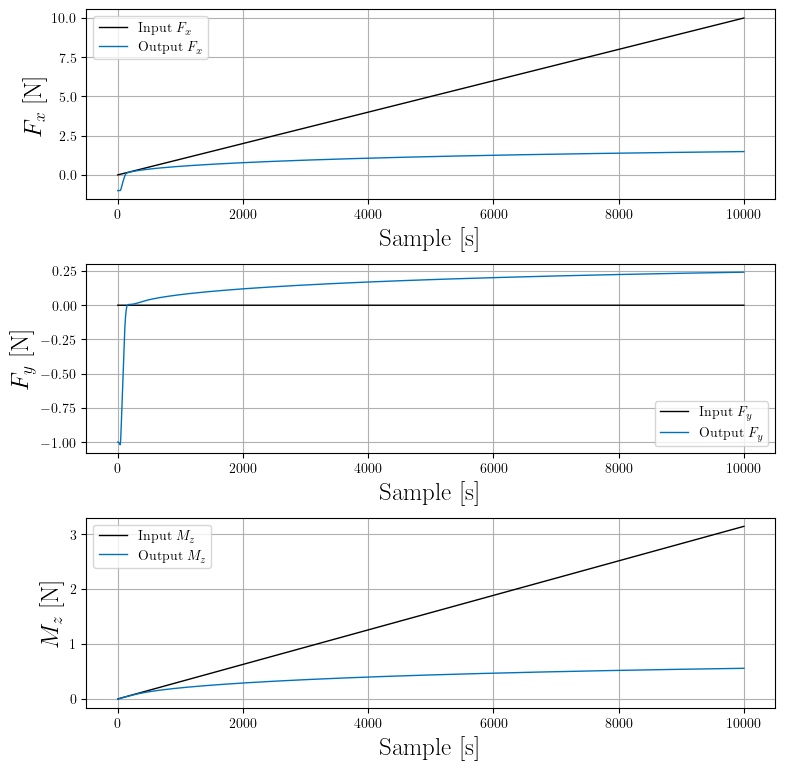

In [8]:
n = 10000
tau_cmd = np.linspace(
    (0,   0, 0, 0, 0, 0),
    (10,  0, 0, 0, 0, np.pi),
    n
)

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=[my_initialize()])
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)